In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from category_encoders.target_encoder import TargetEncoder
import pandas as pd

In [262]:
data = pd.read_csv('student-mat.csv')
corr = data.corr()['G3']

C:\Users\vikto\AppData\Local\Temp\ipykernel_10116\2382905503.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['G3']


In [263]:
corr = corr[(corr >= 0.1) | (corr <= -0.1)]

In [264]:
sns.swarmplot(x=data['traveltime'], y=data['G3'])

In [265]:
data.groupby('studytime', as_index=False).agg({'G3': 'mean'})

In [266]:
mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(data['Mjob'], data['G3'])
data['Mjob_encoded'] = mjob_target_encoder.transform(data['Mjob'])


In [268]:
fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(data['Fjob'], data['G3'])
data['Fjob_encoded'] = fjob_target_encoder.transform(data['Fjob'])


In [269]:
higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(data['higher'], data['G3'])
data['higher_encoded'] = higher_target_encoder.transform(data['higher'])


In [270]:
schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(data['schoolsup'], data['G3'])
data['schoolsup_encoded'] = schoolsup_target_encoder.transform(data['schoolsup'])


In [271]:
dataset = data.drop(columns=['school', 'gender', 'address', 'famsize', 'Pstatus', 
        'Mjob', 'Fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'health', 'absences'])

In [272]:
dataset = dataset[dataset['G3'] != 0]
X = dataset.drop(columns='G3')
Y = dataset['G3']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=50)

In [298]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [299]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [303]:
model.score(X_test_scaled, y_test)

0.6473450745446452

In [304]:
def score_model(model, X_test_scaled, y_test):
    y_preds = model.predict(X_test_scaled)
    
    errs = []
    
    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y - y_pred))
        
    mae = sum(errs) / len(errs)
    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - sum(err ** 2 for err in errs) / sum((y - mean_y_test) ** 2 for y in y_test)
    
    return mae, r2

In [306]:
score_model(model, X_test_scaled, y_test)

(1.4549728280964347, 0.6473450745446452)

In [311]:
maes = []
r2s = []

X_y_test = X_test.copy()
X_y_test['y'] = y_test

for i in range(1000):
    X_y_sample = X_y_test.sample(len(X_y_test), replace=True)
    
    X_test_sample = X_y_sample.drop(columns='y')
    X_test_sample = scaler.transform(X_test_sample)
    
    y_test_sample = X_y_sample['y']
    
    mae_sample, r2_sample = score_model(model, X_test_sample, y_test_sample)
    maes.append(mae_sample)
    r2s.append(r2_sample)

<AxesSubplot: ylabel='Count'>

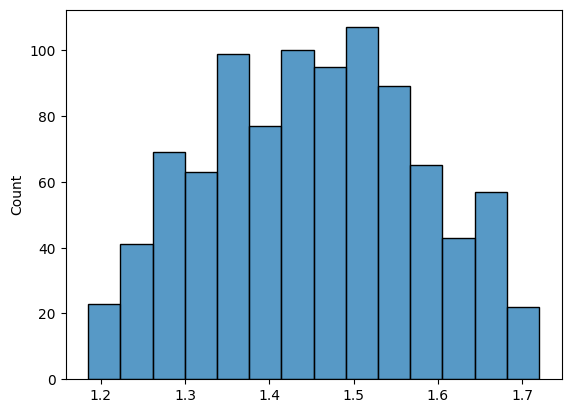

In [318]:
sns.histplot(maes)

In [315]:
maes = sorted(maes)
maes = maes[25:975]

In [317]:
maes[0], maes[-1]

(1.1851556145255053, 1.7201789399251988)

In [319]:
model.coef_

array([-1.84157482,  0.5698539 ,  0.02408284, -0.07740543,  0.09977451,
       -0.05695367, -0.29510771, 12.43872211,  0.17814796, -0.24836759,
       -0.66148831,  0.26574973])

In [323]:
for x, coeff in zip(X_train.columns, model.coef_):
    print(f'{x}\t{coeff}')

age	-1.841574815498638
Medu	0.5698538968372117
Fedu	0.024082835617097037
traveltime	-0.0774054262652228
studytime	0.09977450931344588
failures	-0.05695367001194773
goout	-0.29510771186960705
G1	12.438722111180079
Mjob_encoded	0.17814795591929888
Fjob_encoded	-0.24836759009635004
higher_encoded	-0.6614883106087621
schoolsup_encoded	0.26574973067512186
